

# Regresión logística

La regresión logística es un modelo utilizado para problemas de clasificación binaria. A diferencia de la regresión lineal, que predice valores continuos, este modelo estima la probabilidad de que una observación pertenezca a una de dos clases. Para ello, aplica una suma ponderada de las variables de entrada (más el intercepto) y luego usa una función sigmoide para transformar el resultado en un valor entre 0 y 1.

La función sigmoide se define como:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$


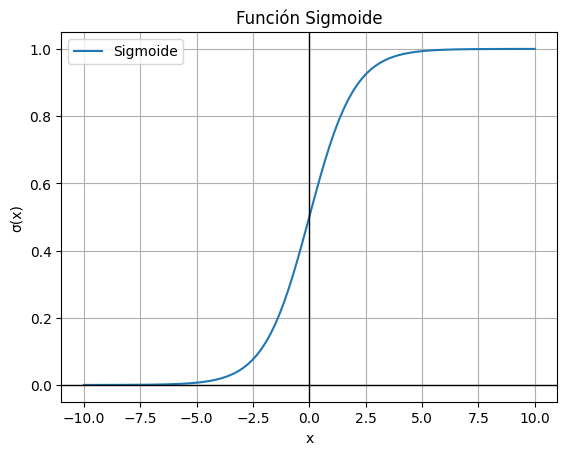

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Crear un rango de valores para x
x = np.linspace(-10, 10, 100)

# Calcular los valores correspondientes de la función sigmoide
y = sigmoid(x)

# Crear la gráfica
plt.plot(x, y, label="Sigmoide")
plt.title("Función Sigmoide")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()


Generalmente, se determina la clase asignada usando un umbral, que por lo general es 0.5: si el valor es mayor a 0.5, se asigna a una clase; si es menor, a la otra.

Vamos a ver un ejemplo utilizando el famoso conjunto de datos **iris**, que contiene la longitud y el ancho de los sépalos y pétalos de 150 flores pertenecientes a tres especies diferentes: Iris-Setosa, Iris-Versicolor e Iris-Virginica.

In [ ]:
from sklearn import datasets
import numpy as np

# Cargar el conjunto de datos iris
iris = datasets.load_iris()

# Mostrar las claves del diccionario
print(list(iris.keys()))

# Extraer el ancho del pétalo (última columna)
X = iris["data"][:, 3:]

# Crear el vector objetivo (1 si es Iris-Virginica, de lo contrario 0)
y = (iris["target"] == 2).astype(int)  # Cambiado np.int a int, Iris-Setosa(0), Iris-Versicolor(1) e Iris-Virginica(2).


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


Ahora procederemos a entrenar el modelo utilizando la regresión logística.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y) # 30% testeo, 70% entrenamiento

#Ahora vamos a entrenar nuestro conjunto de datos
#creacion del modelo
log_reg = LogisticRegression()
#entrenamiento del modelo
log_reg.fit(X_train, y_train)

LogisticRegression()

A continuación se va a graficar el umbral

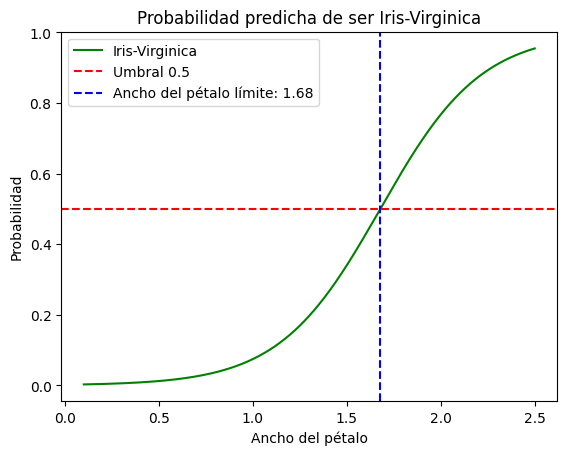

In [ ]:

# Generar nuevos datos entre 0 y 3 para la predicción

X_min = X.min()
X_max = X.max()
X_new = np.linspace(X_min, X_max, 1000).reshape(-1, 1)

# Predecir las probabilidades con el modelo de regresión logística entrenado
y_proba = log_reg.predict_proba(X_new)

# Graficar la probabilidad de ser Iris-Virginica
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")

# Graficar el umbral de clasificación (por lo general 0.5)
plt.axhline(y=0.5, color='r', linestyle='--', label="Umbral 0.5")

# Encontrar el valor de X_new donde la probabilidad cruza el umbral de 0.5
# np.argmax() encuentra el primer índice donde la probabilidad es mayor o igual a 0.5
decision_boundary = X_new[np.argmax(y_proba[:, 1] >= 0.5)]

# Agregar una línea vertical en el punto de cambio de clasificación
plt.axvline(x=decision_boundary, color='b', linestyle='--', label=f"Ancho del pétalo límite: {decision_boundary[0]:.2f}")


# Mejorar el gráfico con etiquetas y título
plt.xlabel("Ancho del pétalo")
plt.ylabel("Probabilidad")
plt.title("Probabilidad predicha de ser Iris-Virginica")
plt.legend()
plt.show()
